In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

import ast
sys.path.append('src/data')
import data_loader

from transformers import pipeline
from collections import defaultdict
from transformers import pipeline


## Analysis of the plot summaries datatset

In [3]:
# Load the plot summaries
file_path_plot_summaries = "data/raw/plot_summaries.txt"
column_names = ["wikipedia_movie_id", "plot"]

# df_plot_summaries = data_loader.load_csv(file_path_plot_summaries, is_tsv=True, column_names = column_names)
# df_plot_summaries.head()

df_plot_summaries = pd.read_csv(file_path_plot_summaries, sep="\t", names=column_names)
df_plot_summaries


,wikipedia_movie_id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho..."
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42300,35102018,American Luthier focuses on Randy Parsons’ tra...
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


In [7]:
# Filtering of the movies which are not in our other filtered dataset
df_imdb_metadata_filtered = pd.read_csv('data/processed/imdb_ratings.csv')
df_plot_summaries_filtered = df_plot_summaries[df_plot_summaries['wikipedia_movie_id'].isin(df_imdb_metadata_filtered['wikipedia_movie_id'])]
df_plot_summaries_filtered.reset_index(drop=True, inplace=True)

# For more readibility
df_plot_summaries = df_plot_summaries_filtered.copy()

In [14]:
# Add the movie title to the plot summaries
file_movies_metadata = 'data/processed/movies_metadata.csv'
df_movies_metadata = pd.read_csv(file_movies_metadata)

df_plot_summaries_filtered['movie_title'] = df_plot_summaries['wikipedia_movie_id'].map(df_movies_metadata.set_index('wikipedia_movie_id')['movie_name'].to_dict())
df_plot_summaries_filtered

,wikipedia_movie_id,plot,movie_title
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues
1,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham
2,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid
3,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark
4,5272176,The president is on his way to give a speech. ...,End Game
...,...,...,...
28722,30352708,Twenty-something Eun-mo listens to a taxi driv...,Paju
28723,2867597,"An attempt to bring the famed ""Mr. Bill"" clay ...",Mr. Bill's Real Life Adventures
28724,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command
28725,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala


In [15]:
# Add the number of words of each plot summary
df_plot_summaries['plot_length'] = df_plot_summaries['plot'].apply(lambda x: len(x.split()))
df_plot_summaries

,wikipedia_movie_id,plot,plot_length
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",25
1,20663735,Poovalli Induchoodan is sentenced for six yea...,496
2,2231378,"The Lemon Drop Kid , a New York City swindler,...",849
3,595909,Seventh-day Adventist Church pastor Michael Ch...,397
4,5272176,The president is on his way to give a speech. ...,344
...,...,...,...
28722,30352708,Twenty-something Eun-mo listens to a taxi driv...,222
28723,2867597,"An attempt to bring the famed ""Mr. Bill"" clay ...",127
28724,1096473,"In 1928 Hollywood, director Leo Andreyev look...",524
28725,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",230


In [28]:
# Add the director and their gender for each plot summary
df_movies_directors = pd.read_csv('data/processed/movies_director.csv')
df_movies_directors

df_plot_summaries['director'] = df_plot_summaries['wikipedia_movie_id'].map(df_movies_directors.set_index('wikipedia_movie_id')['Director'].to_dict())
df_plot_summaries['director_gender'] = df_plot_summaries['wikipedia_movie_id'].map(df_movies_directors.set_index('wikipedia_movie_id')['Gender'].to_dict())
df_plot_summaries

,wikipedia_movie_id,plot,plot_length,director,director_gender
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",25,Pavel Lungin,M
1,20663735,Poovalli Induchoodan is sentenced for six yea...,496,Shaji Kailas,M
2,2231378,"The Lemon Drop Kid , a New York City swindler,...",849,Sidney Lanfield Frank Tashlin (uncredited),M
3,595909,Seventh-day Adventist Church pastor Michael Ch...,397,Fred Schepisi,M
4,5272176,The president is on his way to give a speech. ...,344,Andy Cheng,M
...,...,...,...,...,...
28722,30352708,Twenty-something Eun-mo listens to a taxi driv...,222,Park Chan-ok,M
28723,2867597,"An attempt to bring the famed ""Mr. Bill"" clay ...",127,Jim Drake,M
28724,1096473,"In 1928 Hollywood, director Leo Andreyev look...",524,Josef von Sternberg,M
28725,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",230,Hemen Gupta,F


## Sentiment Analysis

In [29]:
# Charger le pipeline avec un modèle d'émotion spécifique
emotion_pipeline = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

# Analyser un résumé de film pour détecter les émotions
text = df_plot_summaries['plot'][0]
result = emotion_pipeline(text)

/Users/maximilien/miniconda3/lib/python3.9/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [30]:
# Function for analyzing the emotion of a text
def emotion_analysis(text):
    chunks = [text[i:i+512] for i in range(0, len(text), 512)]
    results = [emotion_pipeline(chunk) for chunk in chunks]

    # Initialize a dictionary to accumulate scores for each emotion
    emotion_scores = defaultdict(list)

    #Process each chunk and accumulate scores
    for chunk_result in results:
        for emotion in chunk_result:
            for i in range(len(emotion)):
                emotion_scores[emotion[i]['label']].append(emotion[i]['score'])
            #print(emotion_scores[emotion['label']])
            #emotion_scores[emotion['label']].append(emotion['score'])

    # Calculate the average score for each emotion
    average_scores = {emotion: sum(scores) / len(scores) for emotion, scores in emotion_scores.items()}

    return average_scores

In [31]:
# get the emotions and dominant emotion for the first n plots
def n_first_emotions(n, df):
    df = df_plot_summaries.head(n)
    df['emotion_scores'] = df['plot'].apply(emotion_analysis)
    df['dominant_emotion'] = df['emotion_scores'].apply(lambda x: max(x, key=x.get))
    return df

In [ ]:
# 1000 first plots
df_plot_summaries_emotions_1000 = n_first_emotions(1000, df_plot_summaries)

In [60]:
def emotion_score_big_dataset_csv(df, output_file, from_index, to_index, batch_size):
    for i in range(from_index, to_index, batch_size):
        batch = df.iloc[i:i + batch_size]

        batch['emotion_scores'] = batch['plot'].apply(emotion_analysis)
        batch['dominant_emotion'] = batch['emotion_scores'].apply(lambda x: max(x, key=x.get))

        batch.to_csv(output_file, mode='a', index=False, header=not os.path.exists(output_file))




output_file = 'src/data/external_data/plot_emotions.csv'
#emotion_score_big_dataset_csv(df_plot_summaries, output_file, 0, df_plot_summaries.shape[0], batch_size=100)


In [64]:
df_plot_emotions = pd.read_csv('src/data/external_data/plot_emotions.csv')
df_plot_emotions.head()

,wikipedia_movie_id,plot,plot_length_nb_words,director,director_gender,emotion_scores,dominant_emotion
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",25,Pavel Lungin,M,"{'anger': 0.1000807136297226, 'disgust': 0.094...",surprise
1,20663735,Poovalli Induchoodan is sentenced for six yea...,496,Shaji Kailas,M,"{'anger': 0.3795353445623602, 'disgust': 0.123...",anger
2,2231378,"The Lemon Drop Kid , a New York City swindler,...",849,Sidney Lanfield Frank Tashlin (uncredited),M,"{'anger': 0.22358500260161235, 'disgust': 0.07...",joy
3,595909,Seventh-day Adventist Church pastor Michael Ch...,397,Fred Schepisi,M,"{'anger': 0.12216404266655445, 'disgust': 0.12...",joy
4,5272176,The president is on his way to give a speech. ...,344,Andy Cheng,M,"{'anger': 0.4168489193543792, 'disgust': 0.024...",fear


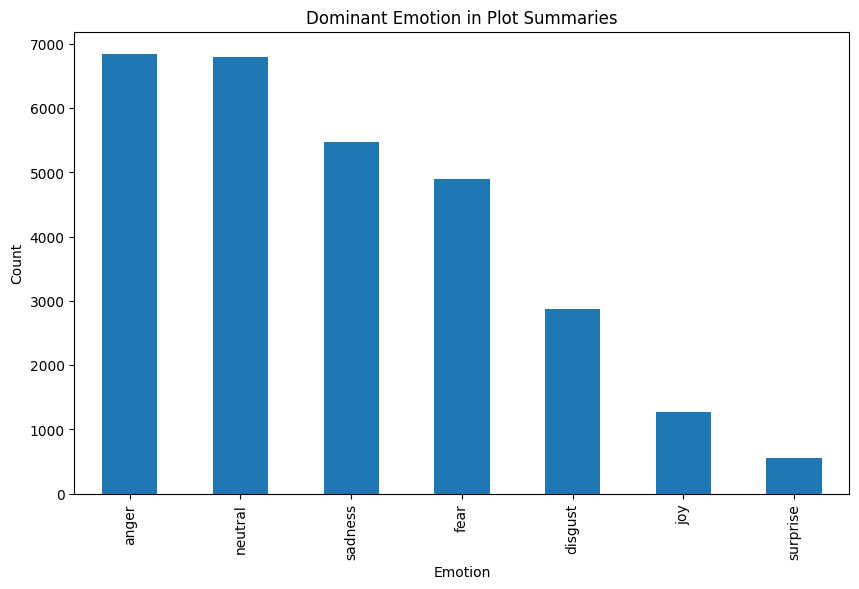

In [67]:
df_plot_emotions['dominant_emotion'].value_counts()
# Je veux en faire un graph 
plt.figure(figsize=(10, 6))
df_plot_emotions['dominant_emotion'].value_counts().plot(kind='bar')
plt.title('Dominant Emotion in Plot Summaries')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

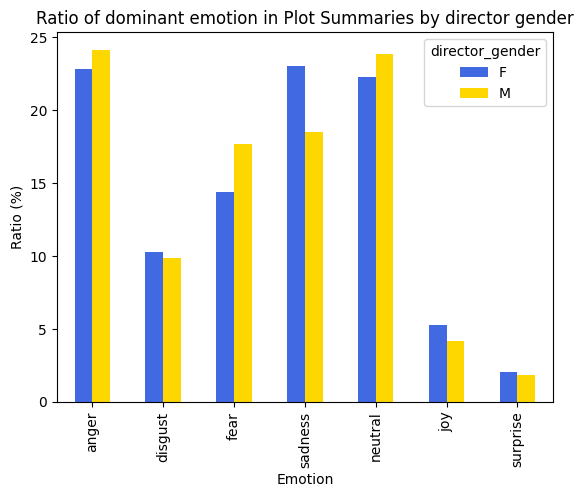

In [107]:
# Je veux avoir le nombre de director M et director F

df_plot_emotions['director_gender'].value_counts()

df_plot_emotions_women = df_plot_emotions[df_plot_emotions['director_gender'] == 'F']
df_plot_emotions_men = df_plot_emotions[df_plot_emotions['director_gender'] == 'M']

# Je veux un graph dans lequel pour chaque dominant emotion, je veux le nombre de director M et F
character_type_gender_counts = df_plot_emotions.groupby(['dominant_emotion', 'director_gender']).size().unstack(fill_value=0)

character_type_gender_counts_ratio_women = character_type_gender_counts['F'] / character_type_gender_counts['F'].sum() * 100
character_type_gender_counts_ratio_men = character_type_gender_counts['M'] / character_type_gender_counts['M'].sum() * 100
character_type_gender_counts_ratio = character_type_gender_counts.copy(deep=True)

character_type_gender_counts_ratio['F'] = character_type_gender_counts_ratio_women
character_type_gender_counts_ratio['M'] = character_type_gender_counts_ratio_men

character_type_gender_counts_ratio = character_type_gender_counts_ratio.reindex(["anger", "disgust", "fear", "sadness", "neutral", "joy", "surprise"])

character_type_gender_counts_ratio.plot(kind='bar', stacked=False, color=['royalblue', 'gold'])
plt.title('Ratio of dominant emotion in Plot Summaries by director gender')
plt.xlabel('Emotion')
plt.ylabel('Ratio (%)')
plt.show()


